# Author: Daniel Akama Nyamweya

# Student score prediction.
This is a simple linear regression project to predict the percentage of marks that a student scores based upon the number of hours they studied.

In [1]:
#pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## importing data

In [3]:
link = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(link)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Understanding
- Here we will check the shape of the dataframe, the general information, check for missing data, duplicates and finally descriptive statistics.

In [4]:
# shape
df.shape

(25, 2)

In [5]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
# missing values
df.isnull().any()

Hours     False
Scores    False
dtype: bool

In [7]:
# duplicates
df.duplicated().any()

False

In [8]:
# descriptive stats
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### summary of data understanding
- The data has 25 rows and 2 columns
- It lacks missing values
- It lacks duplicate entries
- The average number of hours studies was 5 hours resulting in a mean score of 51%

## EDA (Exploratory Data Analysis)

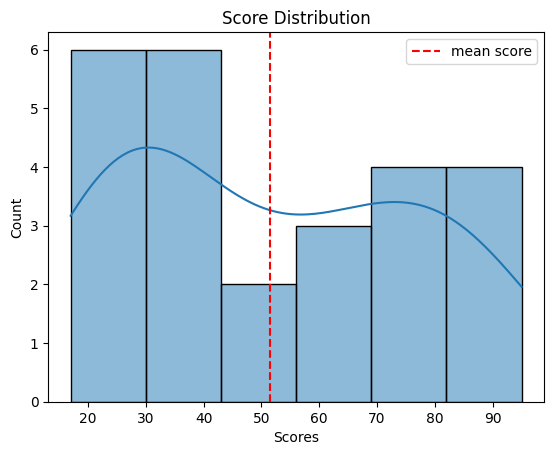

In [9]:
# Lets see the score distribution
sns.histplot(df.Scores, kde=True)
plt.title('Score Distribution')
plt.axvline(x=df.Scores.mean(), label='mean score', linestyle='--', color='red')
plt.legend();

- From the graph above we see that most students scored above average

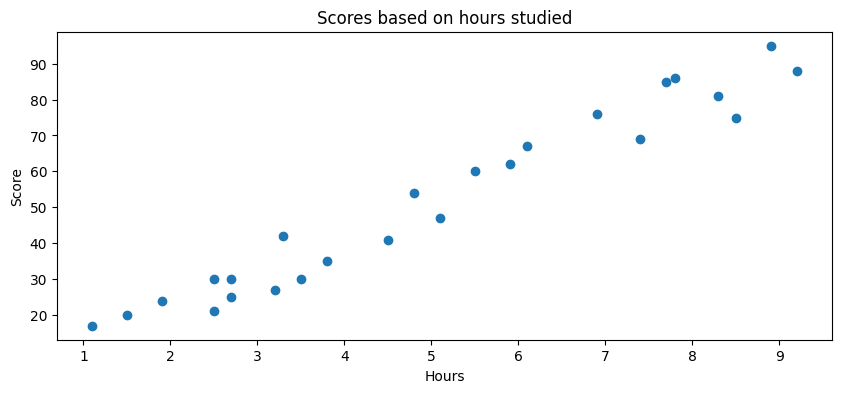

In [10]:
# lets see the scores in terms of hours
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(x='Hours', y='Scores', data=df)
plt.title('Scores based on hours studied')
plt.xlabel('Hours')
plt.ylabel('Score');

- From the graph above we see that there is a positive linear relationship between Hours studied and percentage Score

## Modelling

In [11]:
# checkin the correlation
matrix = df.corr()
matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the correlation analysis, the 2 columns have a strong correlation. We will build our baseline model with this variables. The scatter plot below shows a linear relationship between our predictor and target variable, thus a good candidate for linear modeling

### linear model

In [12]:
# importing libs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
# separating target and predictor variables
x  = df.Hours
y = df.Scores

In [14]:
# reshaping the dataframe to 1-dimension
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [15]:
# train test split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# fit and predict
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

### Making Predictions
- Now that we have trained our algorithm, it's time to make some predictions

In [17]:
y_pred = reg.predict(x_test) # predicting the scores

In [18]:
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()


In [19]:
# comparing y_pred and actual (y_test)
df2 = pd.DataFrame({'Actual score': y_test, 'Predicted score': y_pred})
df2


,Actual score,Predicted score
0,81,83.622842
1,30,26.923182
2,21,26.923182
3,76,69.936717
4,62,60.160913


In [20]:
hours_studied = [[9.25]]
predicted_score = reg.predict(hours_studied).round()
print("Number of hours = {}".format(hours_studied))
print("Predicted score the student is likely to get = {}%".format(predicted_score))


Number of hours = [[9.25]]
Predicted score the student is likely to get = [[93.]]%


## Model Evaluation
- Here we use Mean absolute error to evaluate the model.

In [21]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

3.905042267216639

# Findings
- There is a strong correlation between Hours studied and Percentage score a student gets. The more time a student studies the higher the likelihood of scoring high.
- The model performed well with an MAE of 3.9050, typically a score close to 0 indicates the model is performing well.
- A student who studied for 9.25 hours was likely to score 93%.